In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
#Fetch Images count from Fodlers

In [3]:
count = 0 
dirs = os.listdir('Images/converted_vehicle_data/')
for dir in dirs:
    files = list(os.listdir('Images/converted_vehicle_data/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

airplane Folder has 173 Images
ambulance Folder has 181 Images
bicycle Folder has 180 Images
boat Folder has 191 Images
bus Folder has 184 Images
car Folder has 185 Images
fire_truck Folder has 184 Images
helicopter Folder has 184 Images
hovercraft Folder has 184 Images
jet_ski Folder has 187 Images
kayak Folder has 190 Images
motorcycle Folder has 191 Images
rickshaw Folder has 183 Images
scooter Folder has 194 Images
segway Folder has 187 Images
skateboard Folder has 188 Images
tractor Folder has 194 Images
truck Folder has 169 Images
unicycle Folder has 177 Images
van Folder has 188 Images
Images Folder has 3694 Images


In [4]:
#Load Images into Arrays as Dataset

In [5]:
base_dir = 'Images/converted_vehicle_data'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3694 files belonging to 20 classes.
Using 2956 files for training.
Found 3694 files belonging to 20 classes.
Using 738 files for validation.


In [7]:
vehicle_names = train_ds.class_names
vehicle_names

['airplane',
 'ambulance',
 'bicycle',
 'boat',
 'bus',
 'car',
 'fire_truck',
 'helicopter',
 'hovercraft',
 'jet_ski',
 'kayak',
 'motorcycle',
 'rickshaw',
 'scooter',
 'segway',
 'skateboard',
 'tractor',
 'truck',
 'unicycle',
 'van']

In [8]:
import matplotlib.pyplot as plt

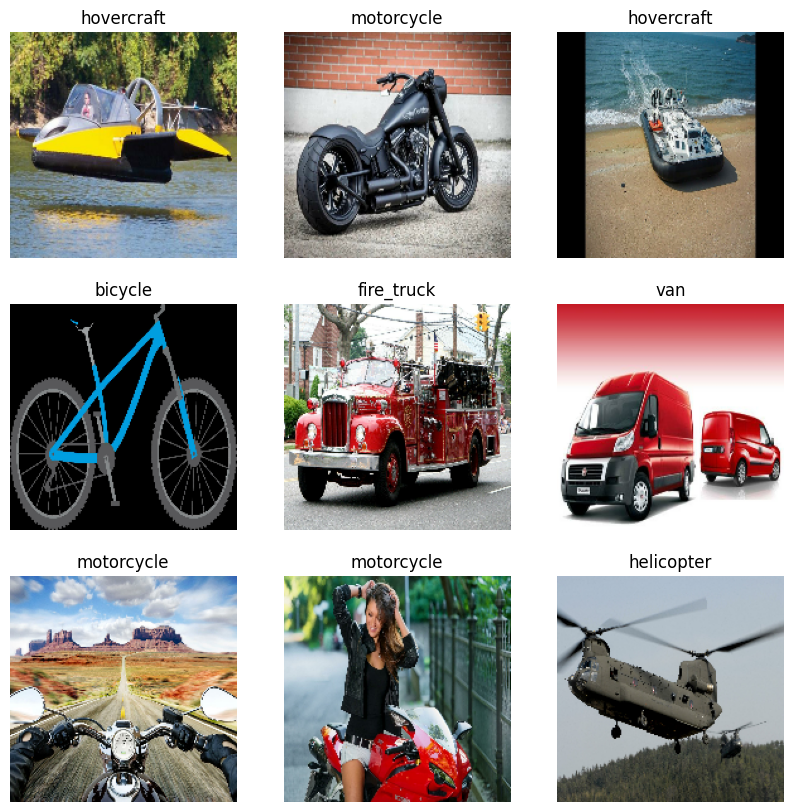

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(vehicle_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

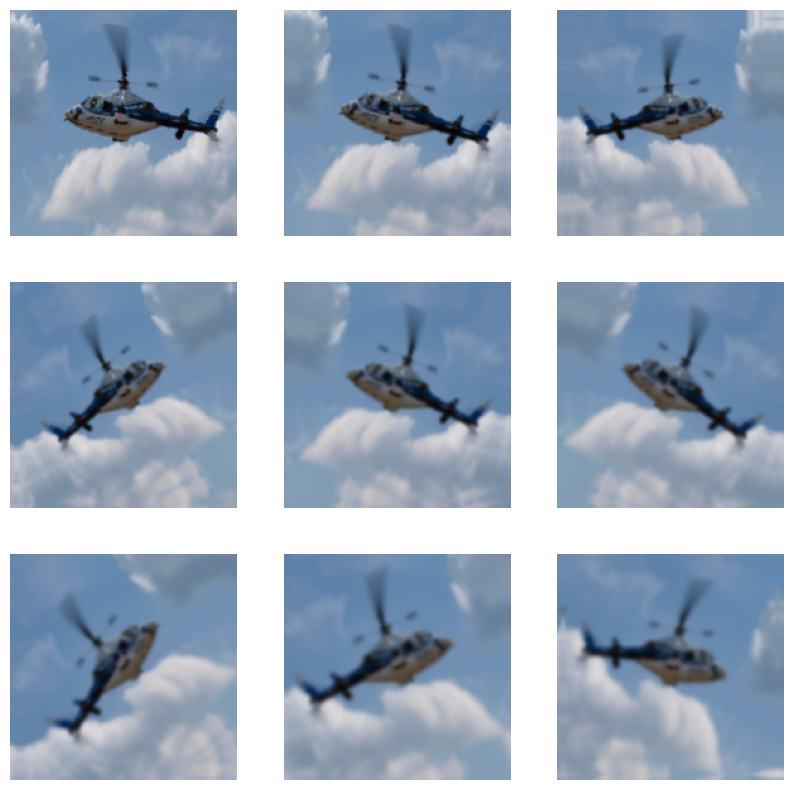

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#MOdel Creation

In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1.0 / 255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(20)  # No activation here; model will output logits
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 20)                    │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,991,220 (15.23 MB)

 Trainable params: 3,991,220 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds, epochs=60, validation_data=val_ds)

Epoch 1/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.0602 - loss: 3.0772 - val_accuracy: 0.1463 - val_loss: 2.7798
Epoch 2/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.1603 - loss: 2.7032 - val_accuracy: 0.1856 - val_loss: 2.7363
Epoch 3/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.2730 - loss: 2.3993 - val_accuracy: 0.2737 - val_loss: 2.3972
Epoch 4/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.2947 - loss: 2.2502 - val_accuracy: 0.3008 - val_loss: 2.2962
Epoch 5/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.3568 - loss: 2.1185 - val_accuracy: 0.3320 - val_loss: 2.2723
Epoch 6/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.3944 - loss: 2.0153 - val_accuracy: 0.3157 - val_loss: 2.4655
Epoch 7/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.4138 - loss: 1.8916 - val_accuracy: 0.3564 - val_loss: 2.2160
Epoch 8/60
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4551 - loss: 1.7739 - val_accu

In [21]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + vehicle_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [22]:
classify_images('Sample/motorcycle.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


'The Image belongs to motorcycle with a score of 99.99074935913086'

In [23]:
classify_images('Sample/car.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'The Image belongs to car with a score of 98.75354170799255'

In [24]:
classify_images('Sample/truck.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'The Image belongs to truck with a score of 65.24935364723206'

In [35]:
model.save('vehicle_model.h5')